# Homework solution: Pybrain Iris

![alt text](https://drive.google.com/uc?id=1xgZhek0467AtlfupqvovcjoFIJ2dB4in)

## Dataset

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
inputs = iris.data

In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
outputs = iris.target

In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Neural network

In [7]:
!pip install https://github.com/pybrain/pybrain/archive/0.3.3.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pybrain/pybrain/archive/0.3.3.zip


In [9]:
import pybrain

In [10]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer, SigmoidLayer

In [11]:
network = buildNetwork(4, 4, 4, 3, outclass = SoftmaxLayer, hiddenclass = SigmoidLayer, bias = False)

In [12]:
dataset = SupervisedDataSet(4, 3)
for i in range(len(inputs)):
  if outputs[i] == 0:
    output = (1, 0, 0, )
  elif outputs[i] == 1:
    output = (0, 1, 0,)
  else:
    output = (0, 0, 1, )
  dataset.addSample((inputs[i][0], inputs[i][1], inputs[i][2], inputs[i][3]), output)

In [13]:
optimizer = BackpropTrainer(module=network, dataset=dataset, learningrate=0.1)

In [14]:
epochs = 10000
error = []
for epoch in range(epochs):
  error_average = optimizer.train()
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(error_average))
    error.append(error_average)

Epoch: 1 Error: 0.11215983297321504
Epoch: 1001 Error: 0.056023169982529646
Epoch: 2001 Error: 0.05592133931909693
Epoch: 3001 Error: 0.055868519345551884
Epoch: 4001 Error: 0.05582642721440686
Epoch: 5001 Error: 0.05579956225881479
Epoch: 6001 Error: 0.055786717217276266
Epoch: 7001 Error: 0.05576571984737594
Epoch: 8001 Error: 0.055755894667759806
Epoch: 9001 Error: 0.055748114027540124


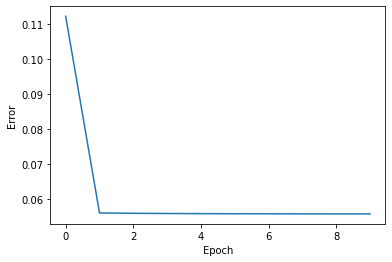

In [15]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(error)

In [16]:
network.params

array([-9.80422600e-01, -3.19790960e+00,  5.26078305e+00,  2.94499777e+00,
        1.24305439e+00,  3.03908969e-01,  7.68833532e-01, -1.15983391e+00,
        8.98753672e-01,  7.61038808e-01,  7.58540014e-01, -1.35700853e+00,
        1.18393179e+00,  1.11902819e-02,  9.96828445e-01, -1.32804394e-02,
       -8.48310727e-01, -2.92364852e+00, -1.42167716e+00, -2.20772651e-01,
       -1.59490483e+00, -1.57871754e+00, -2.06936689e+00, -1.05558066e-01,
        3.46480532e+00, -8.11345347e-01, -1.29189363e+00, -2.41627761e+00,
       -8.65321436e+00,  1.07172781e+00,  9.98580650e-01,  4.52249135e-01,
       -1.07217599e+00, -6.50953289e-01, -1.93925346e+01,  8.85125682e+00,
        1.87441815e-01,  2.30327140e-01,  1.04507958e+01, -3.83330522e+00,
        1.39354779e+00, -7.51793743e-01,  1.04568418e+01, -5.11542805e+00])

In [17]:
print(inputs[0])
print(outputs[0])

[5.1 3.5 1.4 0.2]
0


In [18]:
import numpy as np
np.argmax(network.activate(inputs[0]))

0